<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/05%20Deep%20Learning/notebooks/3-MLP_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h4>Redes neuronales en tareas de Regresión</h4>

En esta notebook se presentan dos ejemplos que ilustran cómo usar redes neuronales MLP como herramientas para tareas de regresión.

In [40]:
import numpy as np
import matplotlib.pyplot as plt

#1. Ejemplo 1: IRIS Dataset

El conjunto de datos de flores de Iris o conjunto de datos de Iris de Fisher es un conjunto de datos introducido por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936 *The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis*. A veces se denomina conjunto de datos de Iris de Anderson porque Edgar Anderson recopiló los datos para cuantificar la variación morfológica de las flores de Iris de tres especies relacionadas. Dos de las tres especies se recogieron en la península de Gaspé "todas en el mismo pasto, y se recogieron el mismo día y se midieron al mismo tiempo por la misma persona con el mismo aparato".

El conjunto de datos consta de 50 muestras de cada una de las tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midieron cuatro características de cada muestra: la longitud y la anchura de los sépalos y los pétalos, en centímetros.

La versión original del dataset puede encontrarse [aquí](https://archive.ics.uci.edu/ml/datasets/iris).

<img align="left" width="50%" src="../img/Iris-dataset.png"/> 

## El conjunto de datos

In [125]:
from sklearn.datasets import load_iris
iris = load_iris()

print(f"Data shape: {iris.data.shape}")

Data shape: (150, 4)


In [126]:
import pandas as pd

data = np.hstack((iris.data,iris.target.reshape(-1,1)))
pd.DataFrame(data,columns=['petal length','petal width','sepal length','sepal width','species'])

,petal length,petal width,sepal length,sepal width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


X data: (150, 2)
Y data: (150, 2)
L data: (150,)


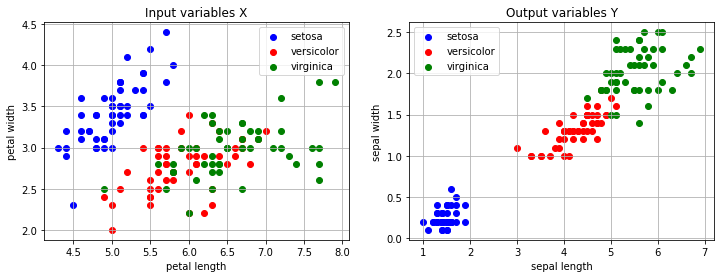

In [127]:
# We will use length and width of petals as X to predict length and width of sepals as Y
# We also keep the labels in a vector L
X = iris.data[:, :2]
Y = iris.data[:, 2:]
L = iris.target

print("X data:", X.shape)
print("Y data:", Y.shape)
print("L data:", L.shape)

# ----- Graficamos -----
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[L==0, 0], X[L==0, 1], c='b', label='setosa')
plt.scatter(X[L==1, 0], X[L==1, 1], c='r', label='versicolor')
plt.scatter(X[L==2, 0], X[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Input variables X')
plt.subplot(1, 2, 2)
plt.scatter(Y[L==0, 0], Y[L==0, 1], c='b', label='setosa')
plt.scatter(Y[L==1, 0], Y[L==1, 1], c='r', label='versicolor')
plt.scatter(Y[L==2, 0], Y[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Output variables Y')
plt.show()

In [128]:
# Split it into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, l_train, l_test = train_test_split(X, Y, L, test_size=0.1)

print("Training + validation inputs X:", x_train.shape)
print("Test inputs X:", x_test.shape)
print("Training + validation outputs Y:", y_train.shape)
print("Test outputs Y:", y_test.shape)
print("Training + validation labels l:", l_train.shape)
print("Test labels l:", l_test.shape)

Training + validation inputs X: (135, 2)
Test inputs X: (15, 2)
Training + validation outputs Y: (135, 2)
Test outputs Y: (15, 2)
Training + validation labels l: (135,)
Test labels l: (15,)


## Creamos la red

In [131]:
# import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense

In [132]:
# Create an MLP of two inputs x=[x1, x2], and two outputs y=[y1, y2]
i = Input(shape=(2,), name='input')
o = Dense(units=2, activation=None, name='output')(i)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 output (Dense)              (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [133]:
# Obtain weights and biases of the hidden layer
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[ 0.53404784 -0.7829732 ]
 [-0.26474208  0.18040693]]
Initial biases (2,)
[0. 0.]


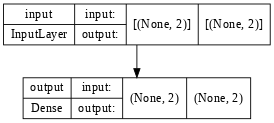

In [134]:
from tensorflow.keras.utils import plot_model

plot_model(MLP, to_file='MLP.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64)

In [135]:
MLP.compile(optimizer='sgd', loss='mse')

## Entrenamos la red

In [ ]:
n_epocas = 100

HISTORY = MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=n_epocas, validation_split=0.1)

Aquí se muestra una segunda forma de graficar la perdida durante el entrenamiento. De esta forma no hay que especificar manualmente la cantidad de épocas.

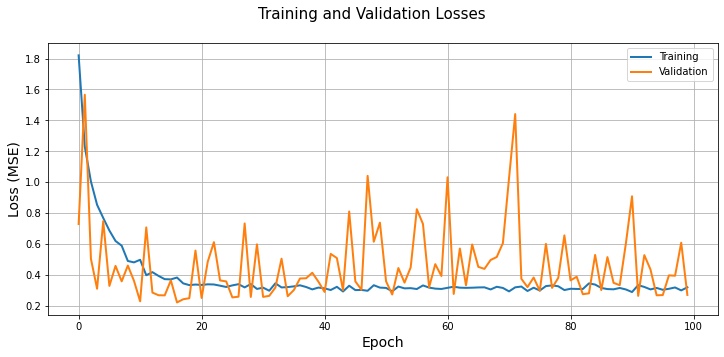

In [137]:
plt.figure(figsize=(12, 5))
plt.suptitle("Training and Validation Losses", fontsize=15)
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss (MSE)', fontsize=14)
plt.grid(True)
plt.show()

In [138]:
# Obtain weights and biases of the hidden layer after training
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[ 1.6457497   0.6364732 ]
 [-1.7829107  -0.72696346]]
Initial biases (2,)
[-0.7580318 -0.4121375]


## Resultados y Evaluación

Use the trained model to compute the average test loss

In [139]:
MLP.evaluate(x=x_test, y=y_test, verbose=False)

0.4066779315471649

In [140]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

(15, 2)


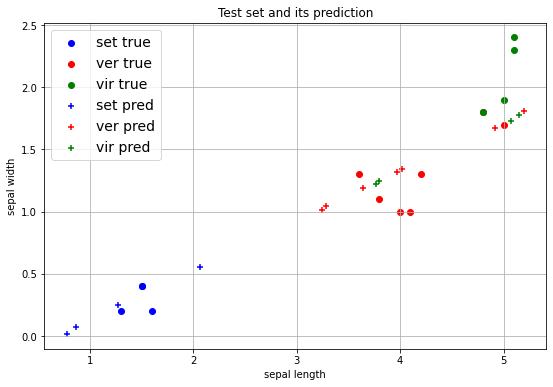

In [149]:
plt.figure(figsize=(9,6))

plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set true')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver true')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir true')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set pred')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver pred')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir pred')

plt.legend(fontsize=14)
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Test set and its prediction')
plt.show()

## Podemos definir la red, de manera alterna, usando la clase `Sequential`.

There are two ways to define a model in `keras`:

* Sequential class: Sequential groups a linear stack of layers into a tf. keras.Model.
* Model class: Model group's layers into an object with training and inference features.

An Sequential model is the simplest type of model, a linear stack of layers. But there are some flaws as we can't build complex networks such as multi-input or multi-output networks using this API.

On the other hand, using the Model class, we can create arbitrary graphs of layers. From this, we can get more flexibility and easily define models where each layer can connect not just with the previous and next layers but also share feature information with other layers in the model.

In [56]:
MLP = Sequential()

MLP.add(Input(shape=(2,), name='input'))
MLP.add(Dense(units=2, activation=None, name='output'))

MLP.summary()

MLP.compile(optimizer='sgd', loss='mse')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output (Dense)              (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
HISTORY = MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=100, validation_split=0.1)

In [58]:
MLP.evaluate(x=x_test, y=y_test, verbose=False)

0.3494007885456085

## Probamos con una red más grande

In [ ]:
i = Input(shape=(2,), name='input')
h = Dense(units=32, activation='sigmoid', name='hidden1')(i)
h = Dense(units=128, activation='sigmoid', name='hidden2')(h)
h = Dense(units=32, activation='sigmoid', name='hidden3')(h)
o = Dense(units=2, activation=None, name='output')(h)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

In [65]:
MLP.compile(optimizer='sgd', loss='mse')

In [ ]:
MLP.fit(x=x_train, y=y_train, batch_size=8, epochs=100, verbose=2, validation_split=0.1)

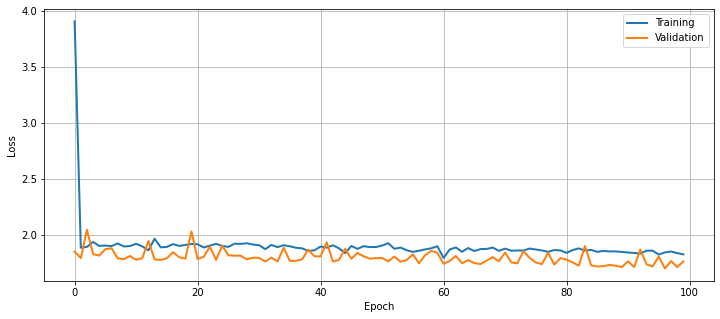

In [67]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 5))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

Obtain weights and biases of the hidden layer

In [ ]:
for layer in MLP.layers[1:]:
  w, b = layer.get_weights()
  print("Weights: ", w.shape, end='\t')
  print("Biases:  ", b.shape)

Weights:  (2, 32)	Biases:   (32,)
Weights:  (32, 64)	Biases:   (64,)
Weights:  (64, 32)	Biases:   (32,)
Weights:  (32, 2)	Biases:   (2,)


In [68]:
# Use the trained model to compute the average test loss
MLP.evaluate(x=x_test, y=y_test, verbose=False)

1.61572265625

In [38]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

(15, 2)


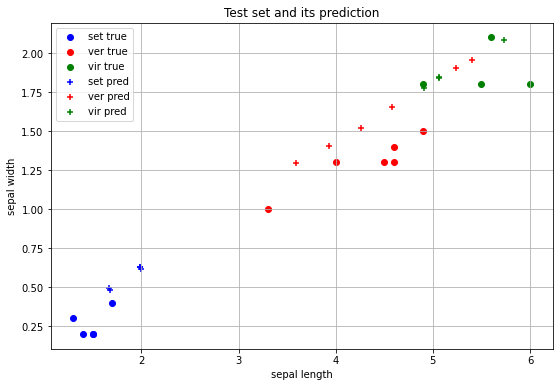

In [72]:
plt.figure(figsize=(9,6))

plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set true')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver true')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir true')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set pred')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver pred')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir pred')

plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Test set and its prediction')
plt.show()

## ⭕ Prática: 

Crea una red neuronal para el problema de predecir la clase usando las 4 mediciones de cada instancia (petal length, petal width, sepal length, sepal width).

# Ejemplo 2: Boston house price dataset

El conjunto de datos describe 13 features numéricas de casas en los suburbios de Boston, el objetivo es modelar el precio de las casas en esos suburbios en miles de dólares. Como tal, se trata de un problema de modelización predictiva por regresión. Los atributos de entrada incluyen, entre otras cosas, la tasa de criminalidad, la proporción de acres de negocios no minoristas y  las concentraciones de productos químicos.

Se trata de un problema bien estudiado en el Machine Learning. El rendimiento razonable de los modelos evaluados mediante el error cuadrático medio (MSE) se sitúa en torno a 20 (en miles de dólares al cuadrado) o 4.5 dólares (si se saca la raíz cuadrada). Este es un buen objetivo para nuestro modelo de red neuronal.

El objetivo de esta práctica es ver el cambio en el rendimiento conforme aplicamos diferentes estrategias al proceso de modelado.

In [73]:
!apt-get -qq install > /dev/null subversion

!svn checkout "https://github.com/DCDPUAEM/DCDP_2022/trunk/05%20Deep%20Learning/data/"

A    data/housing.data
A    data/mnist_biases1.npy
A    data/mnist_biases2.npy
A    data/mnist_weights1.npy
A    data/mnist_weights2.npy
Checked out revision 117.


## El conjunto de datos

In [91]:
import pandas as pd

df = pd.read_csv("/content/data/housing.data", delim_whitespace=True, header=None)
display(df)

dataset = df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

## Usando el conjunto de datos *as is*

In [93]:
]from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(1, activation=None))

model.summary()

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 13)                182       
                                                                 
 dense_7 (Dense)             (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [94]:
n_epocas = 50

history = model.fit(X_train, y_train, epochs=n_epocas, validation_split=0.1)

Epoch 1/50
13/13 [==============================] - 1s 13ms/step - loss: 38128.7266 - val_loss: 29593.7480
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 25163.9863 - val_loss: 19050.6035
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 15727.1318 - val_loss: 11574.0186
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 9267.9404 - val_loss: 6572.5117
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 5087.7437 - val_loss: 3496.7849
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 2619.5964 - val_loss: 1829.3223
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 1348.5439 - val_loss: 1016.8441
Epoch 8/50
13/13 [==============================] - 0s 4ms/step - loss: 761.5453 - val_loss: 688.1412
Epoch 9/50
13/13 [==============================] - 0s 5ms/step - loss: 524.3021 - val_loss: 569.2761
Epoch 10/50
13/13 [==============================] - 0s 4ms/s

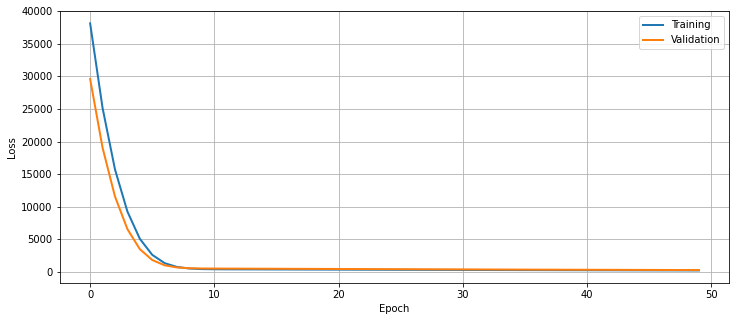

In [95]:
plt.figure(figsize=(12, 5))
plt.plot(model.history.history['loss'], label='Training', linewidth=2)
plt.plot(model.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [96]:
model.evaluate(x=X_test, y=y_test, verbose=False)

216.6927947998047

## Escalando

In [85]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [86]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(1, activation=None))

model.summary()

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 13)                182       
                                                                 
 dense_5 (Dense)             (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [89]:
n_epocas = 50

history = model.fit(X_train, y_train, epochs=n_epocas, validation_split=0.1)

Epoch 1/50
13/13 [==============================] - 0s 7ms/step - loss: 472.0978 - val_loss: 468.1790
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 461.9300 - val_loss: 458.9946
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 451.7945 - val_loss: 449.6774
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 441.4497 - val_loss: 440.1140
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 431.1020 - val_loss: 430.8433
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 420.6450 - val_loss: 421.3918
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 410.4052 - val_loss: 411.7434
Epoch 8/50
13/13 [==============================] - 0s 4ms/step - loss: 399.7195 - val_loss: 402.4894
Epoch 9/50
13/13 [==============================] - 0s 4ms/step - loss: 389.4562 - val_loss: 392.9921
Epoch 10/50
13/13 [==============================] - 0s 4ms/step - loss: 378.7899 

In [90]:
model.evaluate(x=X_test, y=y_test, verbose=False)

44.447242736816406

## Usando una red más profunda

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/data/housing.data", delim_whitespace=True, header=None)
dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [99]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [120]:
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.summary()

model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 13)                182       
                                                                 
 dense_18 (Dense)            (None, 6)                 84        
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [121]:
n_epocas = 50

history = model.fit(X_train, y_train, epochs=n_epocas, validation_split=0.1)

Epoch 1/50
13/13 [==============================] - 1s 14ms/step - loss: 557.0175 - val_loss: 510.4807
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 491.2469 - val_loss: 417.6907
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 382.3611 - val_loss: 280.5446
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 245.5976 - val_loss: 141.1806
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 154.6263 - val_loss: 95.7253
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 136.6244 - val_loss: 91.0536
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 127.0780 - val_loss: 87.9156
Epoch 8/50
13/13 [==============================] - 0s 5ms/step - loss: 119.4621 - val_loss: 82.3401
Epoch 9/50
13/13 [==============================] - 0s 4ms/step - loss: 111.0341 - val_loss: 78.4374
Epoch 10/50
13/13 [==============================] - 0s 4ms/step - loss: 103.1867 - va

In [122]:
model.evaluate(x=X_test, y=y_test, verbose=False)

30.750545501708984

In [106]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mean_squared_error(y_test,y_pred)

21.04384657707839

## Usando una red más ancha

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/data/housing.data", delim_whitespace=True, header=None)
dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [108]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [116]:
model = Sequential()
model.add(Dense(50, input_dim=13, activation='relu'))
model.add(Dense(1, activation=None))

model.summary()

model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 50)                700       
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________


In [117]:
n_epocas = 50

history = model.fit(X_train, y_train, epochs=n_epocas, validation_split=0.1)

Epoch 1/50
13/13 [==============================] - 1s 22ms/step - loss: 1698.5701 - val_loss: 497.9362
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 505.6781 - val_loss: 113.9635
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 122.2952 - val_loss: 91.9374
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 91.4009 - val_loss: 100.5039
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 85.3560 - val_loss: 79.0052
Epoch 6/50
13/13 [==============================] - 0s 7ms/step - loss: 77.6537 - val_loss: 64.6094
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 72.2563 - val_loss: 67.1865
Epoch 8/50
13/13 [==============================] - 0s 8ms/step - loss: 69.9628 - val_loss: 73.4926
Epoch 9/50
13/13 [==============================] - 0s 10ms/step - loss: 68.7169 - val_loss: 65.2413
Epoch 10/50
13/13 [==============================] - 0s 5ms/step - loss: 64.0180 - val_loss

In [118]:
model.evaluate(x=X_test, y=y_test, verbose=False)

22.056289672851562